# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as gcf
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy import interp
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix


# Reading the files

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test_without_target.csv')

# Part A - Exploration

In [3]:
print ('checking the first 5 rows - looking at our data')

train.head()

checking the first 5 rows - looking at our data


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,label
0,A,5.0,D,T,0.0,a,A,1.0,c0,3.669168,...,1169.066667,60.0,181.278476,1.653801,409.912263,0.0,18.0,180.0,11.0,1
1,A,11.0,E,T,1.0,e,A,1.0,c0,2.658162,...,876.420000,130.0,256.966948,3.234822,259.659556,0.0,0.0,80.0,3.0,0
2,D,10.0,B,R,0.0,a,A,1.0,c0,5.437138,...,1210.406667,100.0,231.301660,3.357442,637.323821,0.0,0.0,100.0,6.0,0
3,C,11.0,B,R,0.0,a,A,1.0,c0,4.536484,...,1677.233333,130.0,256.867858,3.127544,271.138934,0.0,0.0,110.0,5.0,1
4,NaN,10.0,D,unknown,0.0,a,A,1.0,c0,2.491467,...,973.093333,100.0,229.547530,2.156058,174.691072,0.0,0.0,80.0,4.0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24420 entries, 0 to 24419
Data columns (total 22 columns):
0        23007 non-null object
1        24331 non-null float64
2        24419 non-null object
3        24381 non-null object
4        24375 non-null float64
5        24318 non-null object
6        24353 non-null object
7        24338 non-null float64
8        24417 non-null object
9        24371 non-null float64
10       24370 non-null float64
11       24385 non-null float64
12       24348 non-null float64
13       24326 non-null float64
14       24344 non-null float64
15       24383 non-null float64
16       24414 non-null float64
17       24399 non-null float64
18       24349 non-null float64
19       24316 non-null float64
20       24322 non-null float64
label    24420 non-null int64
dtypes: float64(15), int64(1), object(6)
memory usage: 4.1+ MB


As we can see there are missing values. 

Moreover there are some features that they are categorical.

In [5]:
# checking the data size

print('Number of samples: ' +str(train.values[:,1:-1].shape[0]))
print('Number of featuers: ' +str(train.values[:,1:-1].shape[1]))

Number of samples: 24420
Number of featuers: 20


In [6]:
# convert the categorile features to numric features

lst_number = []
lst_str = []
for i in range(len(train.dtypes)):
    if train.dtypes[i] == 'object':
        lst_str.append(i)
    else:
        lst_number.append(i)
print ('The feature that represent object type are: ' + str(lst_str))
print ('The feature that represent numbers are: ' + str(lst_number))
print ('Since ' + str((float(len(lst_str))/((len(lst_str))+(len(lst_number))))) + ' from features are object we will replace the data that represent object type as number' + "\n")

#changing object data to numbers
dictt = {'a':'1','b':'2','c':'3','d':'4','e':'5','f':'6','g':'7','h':'8',
    'i':'9','j':'10','k':'11','l':'12','m':'13','n':'14','o':'15','p':'16','q':'17',
    'r':'18','s':'19','t':'20','u':'21','v':'22','w':'23','x':'24','y':'25','z':'26','A':'1','B':'2','C':'3','D':'4','E':'5','F':'6','G':'7','H':'8',
    'I':'9','J':'10','K':'11','L':'12','M':'13','N':'14','O':'15','P':'16','Q':'17',
    'R':'18','S':'19','T':'20','U':'21','V':'22','W':'23','X':'24','Y':'25','Z':'26'}

train_after = train.copy()
train_after = train_after.applymap(lambda s: int(dictt.get(s)) if s in dictt else s)

test_after = test.copy()
test_after = test_after.applymap(lambda m: int(dictt.get(m)) if m in dictt else m)

lst_number_after = []
lst_str_after = []
for i in range(len(train_after.dtypes)):
    if train_after.dtypes[i] == 'object':
        lst_str_after.append(i)
    else:
        lst_number_after.append(i)
        
print ('After the changes we will have:')
print ('The feature that represent object type are: ' + str(lst_str_after))
print ('The feature that represent numbers are: ' + str(lst_number_after))
print ('Since ' + str((float(len(lst_str_after))/((len(lst_str_after))+(len(lst_number_after))))) + ' from features are object we will replace the data that represent object type as number' + "\n") 



The feature that represent object type are: [0, 2, 3, 5, 6, 8]
The feature that represent numbers are: [1, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Since 0.2727272727272727 from features are object we will replace the data that represent object type as number

After the changes we will have:
The feature that represent object type are: [3, 8]
The feature that represent numbers are: [0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Since 0.09090909090909091 from features are object we will replace the data that represent object type as number



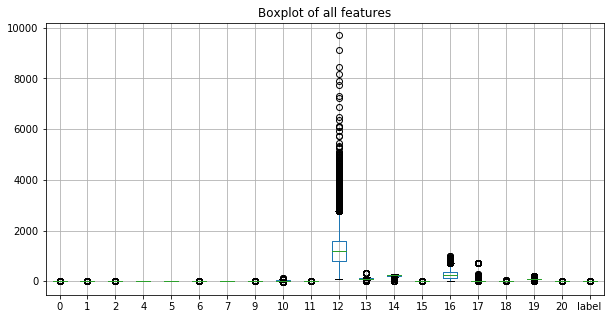

As we can see column number 12 has the most values that are out of range


In [7]:
# box plot of all the features
stat_table = train_after.describe()
final_train = train_after[[i for i in stat_table.columns]] # new data frame for train only with numbers. (without columns 3 and 8)

final_test = test_after[[i for i in stat_table.columns[:-1]]] # new data frame for test only with numbers.(without columns 3 and 8)

# Do not refer to column 3 and 8 
plt.figure(figsize=(10,5))
final_train.boxplot()
plt.title('Boxplot of all features')
plt.show() # print boxplot

print ('As we can see column number 12 has the most values that are out of range')

## Statistical data

In [8]:
mean = [np.mean(final_train[i]) for i in final_train.columns]
std = [np.std(final_train[i]) for i in final_train.columns]
mini = [np.min(final_train[i]) for i in final_train.columns]
maxi = [np.max(final_train[i]) for i in final_train.columns]
stat = pd.DataFrame({'mean': mean, 'std':std, 'min':mini, 'maxi':maxi },index = [i for i in final_train.columns])
stat


,maxi,mean,min,std
0,7.000000,1.844743,1.000000,1.584680
1,13.000000,8.847096,0.000000,2.192633
2,7.000000,4.106024,1.000000,1.194204
4,1.000000,0.454113,0.000000,0.497890
5,6.000000,3.371289,1.000000,1.752991
6,5.000000,1.222067,1.000000,0.627104
7,1.000000,0.670022,0.000000,0.470205
9,7.235182,3.671814,1.960714,1.007732
10,109.813493,26.197359,-50.339925,20.040072
11,16.289653,6.370249,2.979403,1.231967


## Plotting

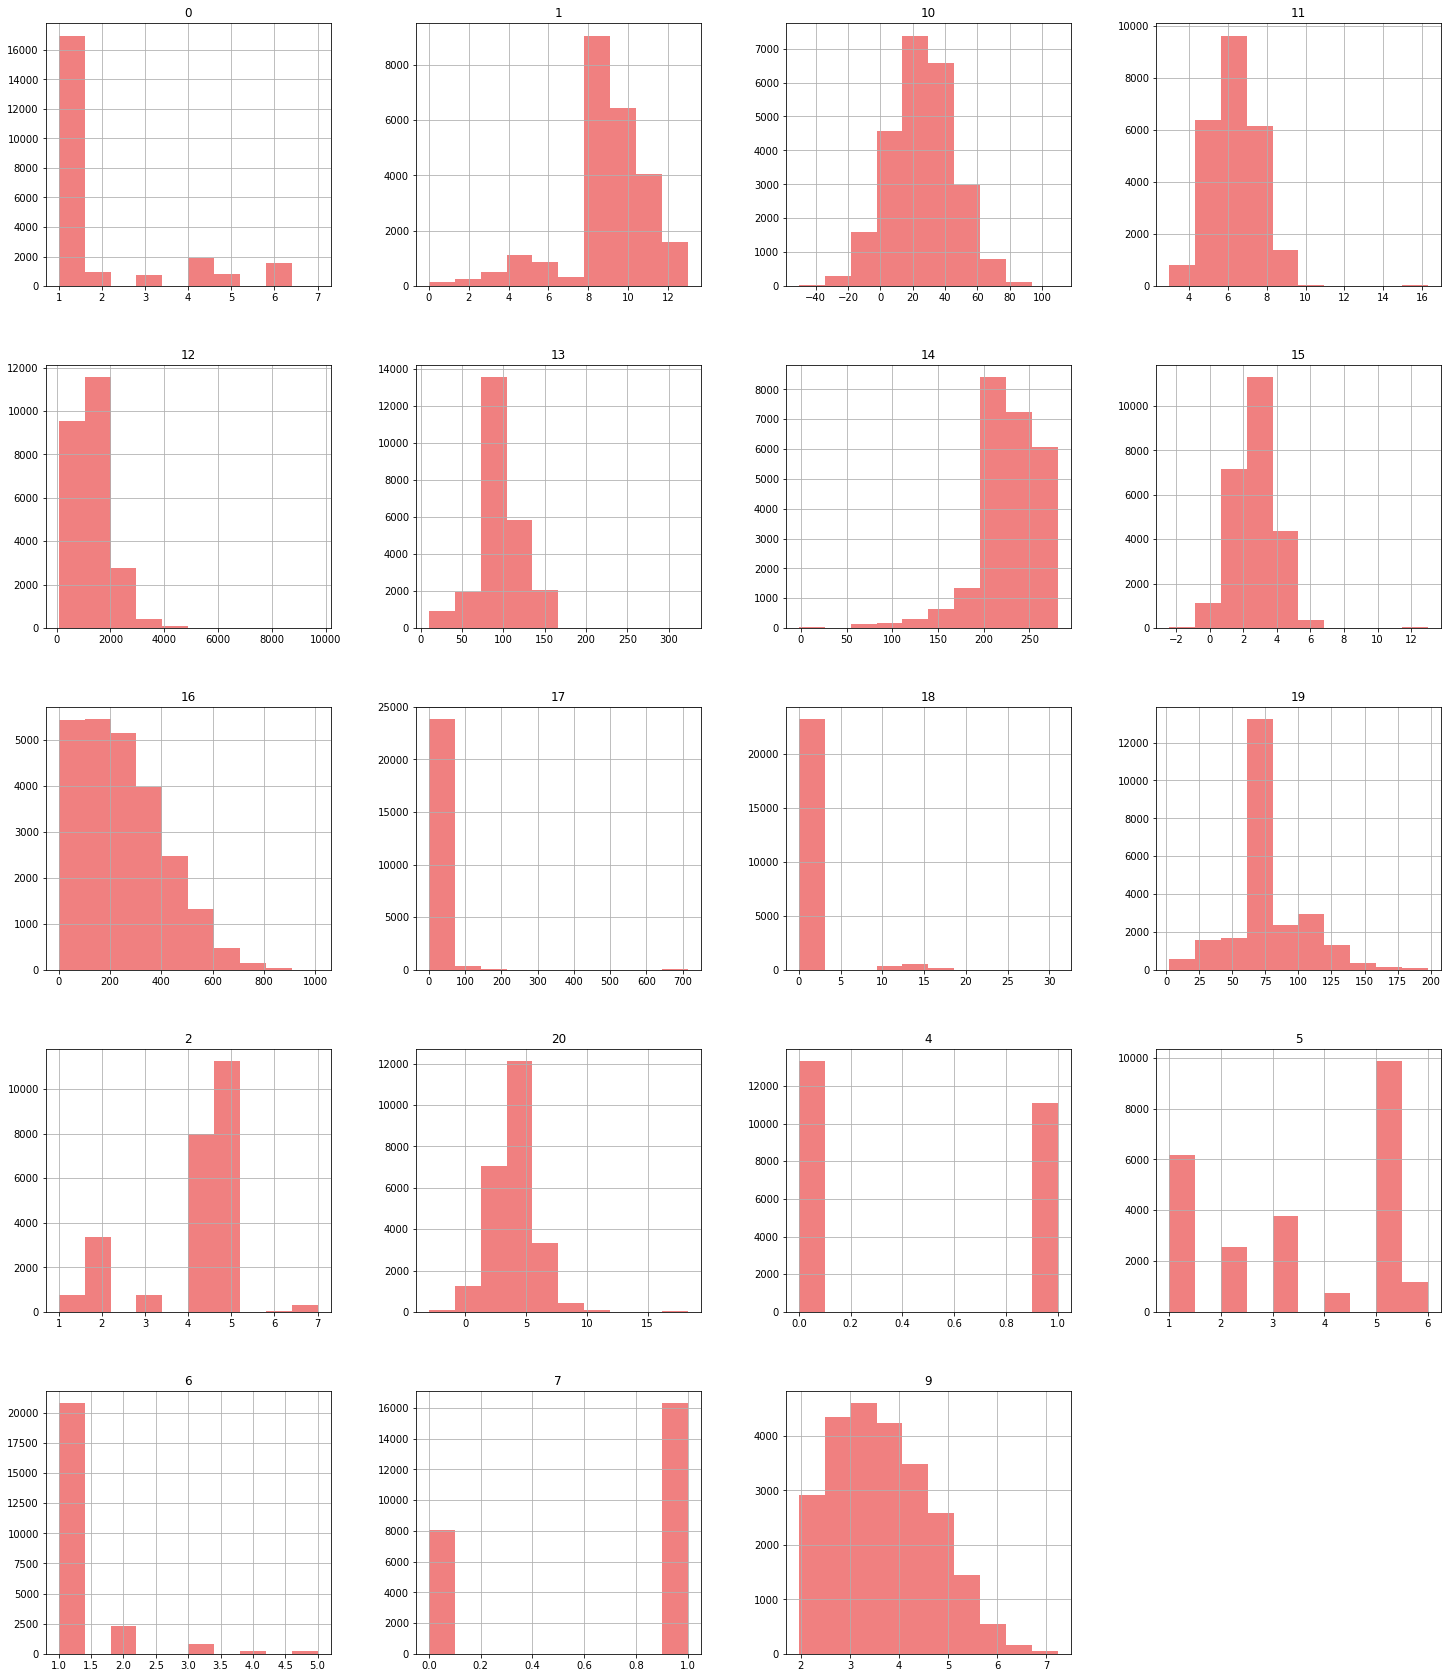

In [9]:
# plot for each column without label

col_name = [name for name in stat_table.columns[:-1]]

final_train[col_name].hist(figsize=[25,30], color = 'lightcoral')
plt.show()





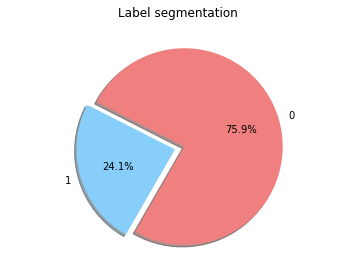

In [10]:
# ploting the distribution of the numbers from the label

labels = '0', '1'
sizes = [final_train.groupby("label").size()[0], final_train.groupby("label").size()[1]]
colors = [ 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=240)
plt.title ('Label segmentation'+"\n") 
plt.axis('equal')
plt.show()

In [11]:
# train_after.describe()

After exploring our data by the describe function we understand that every column has some Nan values, therefore we will change the Nan values to the mean of the column

In [12]:
# changing all the Nan values to the mean of the columns - in train and in test data

for col in final_train.columns:
    col_mean = final_train[col].mean()
    final_train[col].fillna(col_mean, inplace=True)
    
for col in final_test.columns:
    col_mean = final_test[col].mean()
    final_test[col].fillna(col_mean, inplace=True)


C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


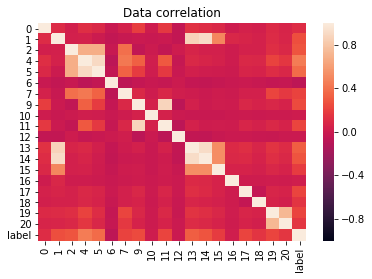

In [13]:
# plot correlation matrix
sns.heatmap(final_train.corr(), 
xticklabels=final_train.corr().columns,
yticklabels=final_train.corr().columns, vmin=-1, vmax=1)
plt.title ('Data correlation')
plt.show()



# Part B - Pre processing

## Outliers removal

In [14]:
def outlier_removal(x_train):
    outlier_with_12 = final_train.copy()
    outlier_with_12 = outlier_with_12[(np.abs(stats.zscore(outlier_with_12)) < 3).all(axis=1)]
    train_outlier = outlier_with_12
    
    # trying to explore the data without column 12: (we decided to keep it)
    
    #outlier_without_12 = x_train.copy()
    #outlier_without_12.drop('12',axis=1, inplace=True)
    #outlier_without_12 = outlier_without_12[(np.abs(stats.zscore(outlier_without_12)) < 3).all(axis=1)] 
    #train_outlier = outlier_without_12
    return (train_outlier)

We noticed that column 12 has the most values that are out of range, 
we checked the result with column 12 and without it - we found out that column 12 had improved the final result.
Therefore we decided to keep it and using all the information about it, before we will drop the outliers. We deleted a few rows. 

# Clustering

In [15]:
def cluster(train, test = ''): # adding 5 new fetures by math operations - same fetures in train and test set
    labels = train.label.values    
    train_without_label = train.drop(['label'],axis=1)
    train_without_label['new_col1'] = ((abs(train_without_label['19']+train_without_label['5']))**0.5)
    train_without_label['new_col2'] = ((abs(train_without_label['7']))**0.5)
    train_without_label['new_col3'] = (abs(train_without_label['12']*train_without_label['2']))
    train_without_label['new_col4'] = (np.log(abs(train_without_label['9'])))
    train_without_label['new_col5'] = ((abs(train_without_label['6']))**0.5)
    train_without_label['label']= labels

    

    
    if len(test)==0:
        return(train_without_label)
    else:
        test['new_col1'] = ((abs(test['19']+test['5']))**0.5)
        test['new_col2'] = ((abs(test['7']))**0.5)
        test['new_col3'] = (abs(test['12']*test['2']))
        test['new_col4'] = (np.log(abs(test['9'])))
        test['new_col5'] = ((abs(test['6']))**0.5)
        return train_without_label, test

# Standardization

## Min Max

In [16]:
def minmax_standardization(train_outlier):
    label = train_outlier.label.values    
    train_without_label = train_outlier.drop(['label'],axis=1)
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit(train_without_label)
    minmax_train = min_max_scaler.transform(train_without_label)
    plt.figure(figsize=(12,8))
    plt.boxplot(minmax_train,widths =1)
    plt.title ('MinMax')
    plt.show()
    train_concat = pd.DataFrame(minmax_train)
    train_concat['label']= label
    return (train_concat) 



##  Z-score normalization

In [17]:
def z_score_normalization(train_outlier,test = ''):
    label = train_outlier.label.values    
    train_without_label = train_outlier.drop(['label'],axis=1)
    standard_scaler = StandardScaler()
    standard_scaler.fit(train_without_label)
    zscore_train = standard_scaler.transform(train_without_label)
    
    if len(test)==0: # making normalization on train and plotting the data after normalization by box-plot
        plt.figure(figsize=(10,5))
        plt.boxplot(zscore_train,widths =1)
        plt.title ('Z-score')
        plt.show()
        train_concat = pd.DataFrame(zscore_train)
        train_concat['label']= label
        return (train_concat) 
    else: # making normalization on test
        zscore_test = standard_scaler.transform(test)
        train_concat = pd.DataFrame(zscore_train)
        train_concat['label']= label
        return train_concat, zscore_test



# Correlations - Feature selection

In [18]:
# plot correlation matrix - train and test data after outliers removal and clustering
def correlations(x_train, test = ''):
    if len(test)==0:
        sns.heatmap(x_train.corr(), 
        xticklabels=x_train.corr().columns,
        yticklabels=x_train.corr().columns, vmin=-1, vmax=1)
        plt.title ('Data correlation')
        plt.show() # plotting the corr of the train data 
        lst_of_features=[]
        for row in range(x_train.corr().shape[0]): # df is the DataFrame
            for col in range(x_train.corr().shape[1]):
                if row!=col and x_train.corr().values[row,col]> (0.85):
                    if [x_train.columns[col],x_train.columns[row]] not in lst_of_features:
                        print ('features', x_train.columns[row] ,'and',  x_train.columns[col], 'are correlated')
                        lst_of_features.append([x_train.columns[row],x_train.columns[col]])
        x_train.drop(1,axis=1, inplace=True)
        x_train.drop(4,axis=1, inplace=True)
        x_train.drop(9,axis=1, inplace=True)
        x_train.drop(11,axis=1, inplace=True)
        x_train.drop(5,axis=1, inplace=True)
        x_train.drop(6,axis=1, inplace=True)
        x_train.drop(22,axis=1, inplace=True)
        x_train.drop(17,axis=1, inplace=True)



        print ('We droped the following columns: 1, 4, 5, 6, 9, 11, 17, 22')
        return pd.DataFrame(x_train)
    else:
        x_train.drop(1,axis=1, inplace=True)
        x_train.drop(4,axis=1, inplace=True)
        x_train.drop(9,axis=1, inplace=True)
        x_train.drop(11,axis=1, inplace=True)
        x_train.drop(5,axis=1, inplace=True)
        x_train.drop(6,axis=1, inplace=True)
        x_train.drop(22,axis=1, inplace=True)
        x_train.drop(17,axis=1, inplace=True)
        test_pd = pd.DataFrame(test)
        test_pd.drop(1,axis=1, inplace=True)
        test_pd.drop(4,axis=1, inplace=True)
        test_pd.drop(9,axis=1, inplace=True)
        test_pd.drop(11,axis=1, inplace=True)
        test_pd.drop(5,axis=1, inplace=True)
        test_pd.drop(6,axis=1, inplace=True)
        test_pd.drop(22,axis=1, inplace=True)
        test_pd.drop(17,axis=1, inplace=True)
        return pd.DataFrame(x_train), test_pd



# PCA 

In [19]:
def principal_component_analysis(train, test = ''):
    label = train.label.values    
    train_without_label = train.drop(['label'],axis=1)
    pca = PCA(n_components=0.95, svd_solver='full') 
    pca.fit(train_without_label)    
    train_new = pca.transform(train_without_label)
    explained_variance_ratio = pca.explained_variance_ratio_

        
    
    new_data=pd.DataFrame(train_new)
    train_concat = pd.DataFrame(new_data)
    
    
    if len(test)==0: # using PCA on the train data and plotting the train data after the PCA
        plt.scatter(x=new_data.columns, y=explained_variance_ratio.cumsum())   
        plt.title('PCA')
        plt.show()
        train_concat['label']= label
        return(train_concat)
    else: # using PCA on the test data
        train_concat['label']= label
        test_new = pca.transform(test)
        test_concat=pd.DataFrame(test_new)
        return train_concat, test_concat
    
    

## Function that running all over the functions from part B

In [20]:
def  pre_processing(train):
    # using outlier function
    train_outlier = outlier_removal(train)
    
    # Clustering
    train_after_cluster = cluster(train_outlier)
    
    # we have two options to normalize the data
    # 1. minmax
    #train_after_norm = minmax_standardization(train_outlier)
    
    # 2. z-score
    train_after_norm = z_score_normalization(train_after_cluster)
    
    # correlation 
    train_after_corr = correlations(train_after_norm)
    
    # PCA
    train_after_PCA = principal_component_analysis(train_after_corr)
    
    
    
    return (train_after_PCA)


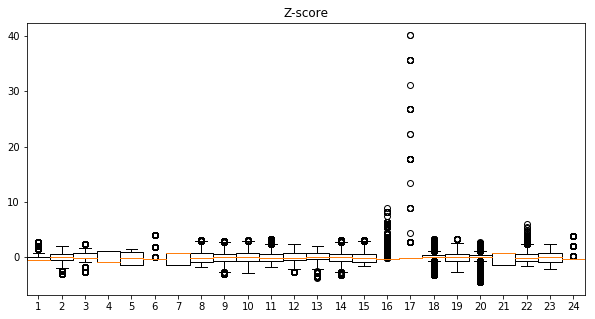

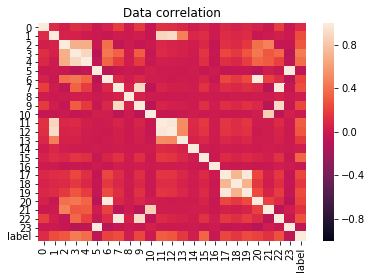

features 1 and 11 are correlated
features 1 and 12 are correlated
features 3 and 4 are correlated
features 5 and 23 are correlated
features 6 and 20 are correlated
features 7 and 9 are correlated
features 7 and 22 are correlated
features 9 and 22 are correlated
features 11 and 12 are correlated
features 17 and 19 are correlated
We droped the following columns: 1, 4, 5, 6, 9, 11, 17, 22


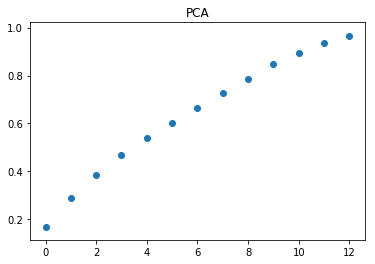

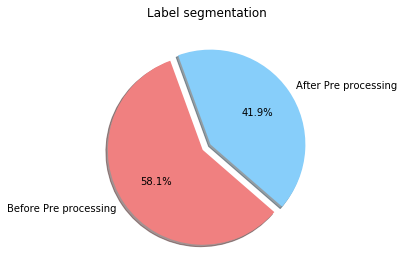

In [21]:
train_part_c = pre_processing(final_train)

# ploting how much data we had before pre processing and after
labels = 'Before Pre processing', 'After Pre processing'
sizes = [18, 13]
colors = [ 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=110)
plt.title ('Label segmentation'+"\n") 
plt.axis('equal')
plt.show()

# Part C - Running the models

## K-fold 

In [22]:
def KfoldPlot(x, clf, k, confusion = False, overfitted = False):
    features = x.values[:,:-1]
    label = x.values[:,-1]
    
    kf = KFold(k, random_state=None, shuffle=False)
    fpr_interp=np.linspace(0, 1, 100) # P is between 0-1 with 100 values. 
    tpr_interp_validation=0 # reset the tpr value
    tpr_interp_train = 0
    plt.figure()
    for train_index, validation_index in kf.split(features):
        features_train, features_validation = features[train_index], features[validation_index]
        label_train, label_validation = label[train_index], label[validation_index]
        
        clf.fit(features_train,label_train)
        predict_train = clf.predict_proba(features_train)[:, 1]
        predict_validation = clf.predict_proba(features_validation)[:,1]
        
        fpr_train, tpr_train, thresholds_train = roc_curve(label_train, predict_train)
        fpr_validation, tpr_validation, thresholds_validation = roc_curve(label_validation, predict_validation)

        
        tpr_interp_train += interp(fpr_interp, fpr_train, tpr_train) #using interp function to make the classifiers speaking in the same languange
        tpr_interp_train[0] = 0.0 # match the first tpr value to 0.0 probability because the first threshold value is over 1.
        
        tpr_interp_validation += interp(fpr_interp, fpr_validation, tpr_validation) #using interp function to make the classifiers speaking in the same languange
        tpr_interp_validation[0] = 0.0 # match the first tpr value to 0.0 probability because the first threshold value is over 1.
        
        if confusion == False and overfitted == False:
            plt.plot(fpr_validation, tpr_validation, color='grey')

    if confusion == False and overfitted == False:
        plt.plot([0, 0], [0, 0], color='grey', linestyle='-', label='K-folds')
        
    tpr_interp_train /= k 
    tpr_interp_train[-1] = 1.0 #make sure that the last tpr value is 1.
    mean_auc_train = auc(fpr_interp, tpr_interp_train)  #calc the auc area.
    
    tpr_interp_validation /= k 
    tpr_interp_validation[-1] = 1.0 #make sure that the last tpr value is 1.
    mean_auc_validation = auc(fpr_interp, tpr_interp_validation)  #calc the auc area.
    
    # finding the classifier name
    clf_name=""
    for c in str(clf):
        if c=="(":
            break
        else:
            clf_name+=c
            
    if confusion == False and overfitted == False:
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    
        #And we plot the mean roc, the red line should be in the middle of all gray lines.
        plt.plot(fpr_interp, tpr_interp_validation, color='red', linestyle='-', label='Mean ROC (area =' + str(mean_auc_validation)[:5]+')')
    
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Validation data -ROC for ' + clf_name)
        plt.legend(loc="lower right")
        plt.show()
    
    #return mean_auc_train,mean_auc_validation
    if confusion == False and overfitted == False:
        return mean_auc_validation
    elif confusion == True and overfitted == False:
        predict_list = []
        for val in predict_validation:
            if val >= 0.8:
                val = 1
            else:
                val = 0
            predict_list.append(val)
        return predict_list, label_validation
    elif overfitted == True:
        return mean_auc_validation ,mean_auc_train, fpr_interp, tpr_interp_validation, tpr_interp_train
        

In [23]:
def finding_best_k(train): 
    auc_list=[]
    K=[]
    # running on all Ks from 1 to train_part_c.shape[1] = numbers of features
    for i in range(1,train.shape[1]+1):
        clf_KNN = KNeighborsClassifier(n_neighbors= i, weights="distance",metric="euclidean")
        temp=KfoldPlot(train_part_c, clf_KNN, 10)
        auc_list.append(temp)
        K.append(i)


    Pdf=pd.DataFrame(data={"K":K,"Auc":auc_list})
    Pdf=Pdf.sort_values(by='Auc', ascending=False)
    return (Pdf)


### Finding the best K value for KNN 

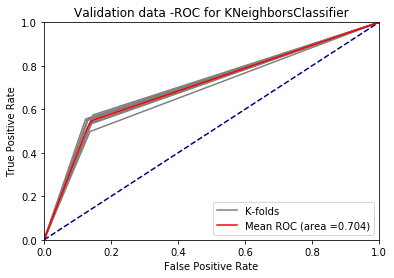

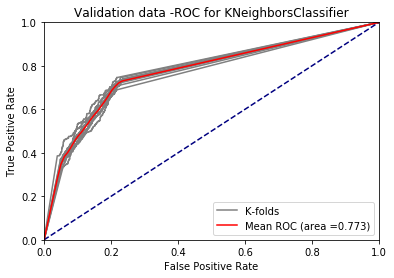

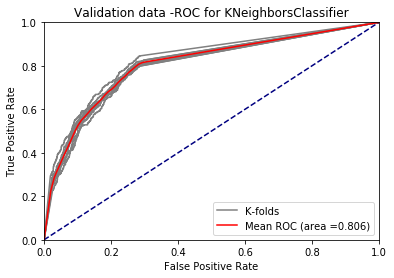

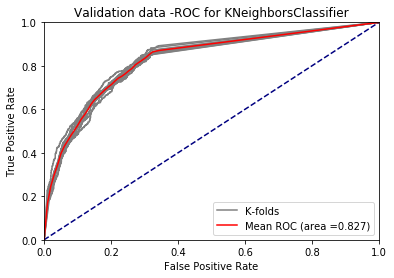

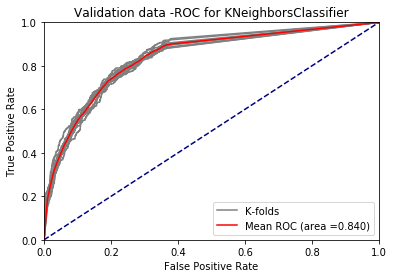

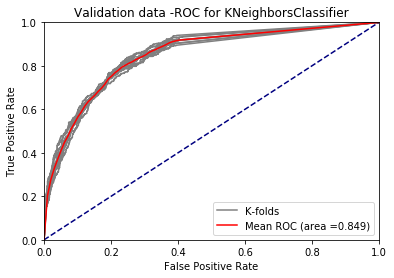

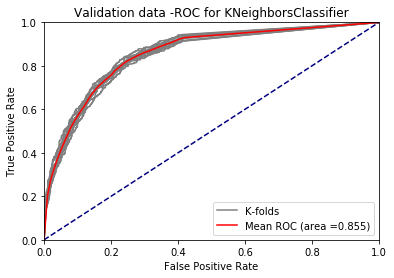

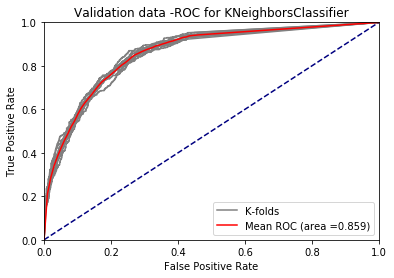

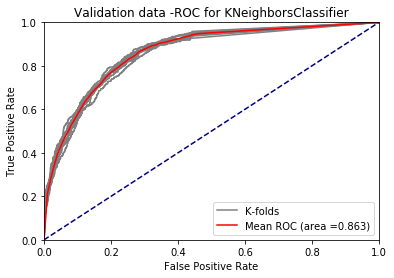

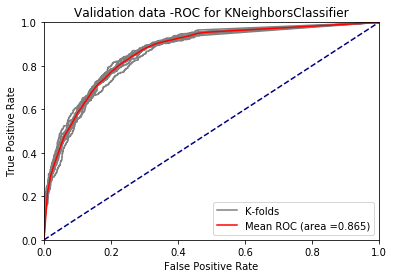

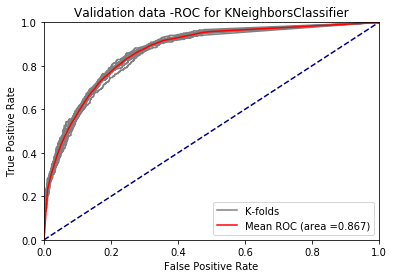

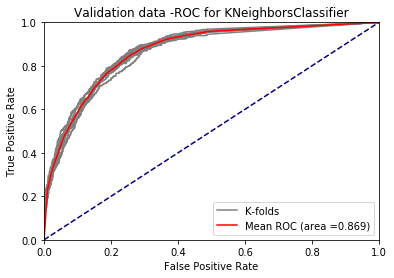

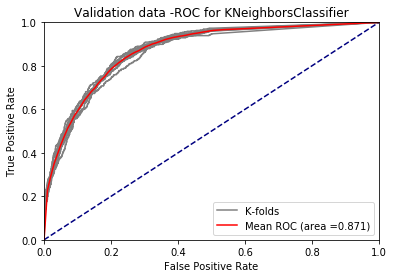

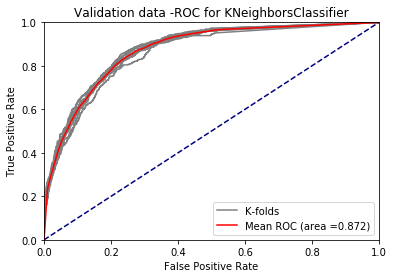

,Auc,K
13,0.872320,14
12,0.871466,13
11,0.869385,12
10,0.867610,11
9,0.865829,10
8,0.863289,9
7,0.859777,8
6,0.855461,7
5,0.849042,6
4,0.840256,5


In [24]:
finding_best_k(train_part_c)

We found out that the best K value is 14 - it has the highest AUC value.

## Grid Search CV 

help us to find the best hyper parameters to every model we have chosen

### KNN

In [25]:
parametersOptions = {'n_neighbors' : [5, len(train_part_c.columns)-1, int(train_part_c.shape[0]**0.5)], 
                      'weights' : ['uniform',
                                   'distance'], 
                      'metric' : ['euclidean', 'minkowski']} 
                     
GS = GridSearchCV(KNeighborsClassifier(), parametersOptions, cv=3, scoring='roc_auc')

train_grid = train_part_c.copy()
label_grid = train_grid.label.values    
train_without_label_grid = train_grid.drop(['label'],axis=1)

GS.fit(train_without_label_grid, label_grid)

print ('KNN neighbors chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
print ("KNN neighbors AUC score with the chosen parameters: ", GS.best_score_)



KNN neighbors chosen parameters (recieved best AUC): {'weights': 'distance', 'metric': 'euclidean', 'n_neighbors': 146}
KNN neighbors AUC score with the chosen parameters:  0.8860671653126709


### Logistic Regression  

In [26]:
parametersOptions = {'penalty' : ['l1','l2'], 
                      'C' : [1.0, 2.0], 
                      'tol' : [0.0001, 0.000001],
                    'max_iter' : [100,50]} 
                  
GS = GridSearchCV(LogisticRegression(), parametersOptions, cv=3, scoring='roc_auc')

train_grid = train_part_c.copy()
label_grid = train_grid.label.values    
train_without_label_grid = train_grid.drop(['label'],axis=1)

GS.fit(train_without_label_grid, label_grid)

print ('Logistic Regression chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
print ("Logistic Regression AUC score with the chosen parameters: ", GS.best_score_)

C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

Logistic Regression chosen parameters (recieved best AUC): {'tol': 0.0001, 'penalty': 'l2', 'C': 2.0, 'max_iter': 100}
Logistic Regression AUC score with the chosen parameters:  0.8845548617016855


C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision Tree

In [27]:
parametersOptions = {'criterion' : ['gini','entropy'], 
                      'max_depth' : [None], 
                      'min_samples_split' : [2, 7],
                    'max_features' : ["auto","sqrt","log2"],
                    "max_leaf_nodes": [None],
                    "min_impurity_split": [1e-7,1e-4]} 
                  
GS = GridSearchCV(DecisionTreeClassifier(), parametersOptions, cv=3, scoring='roc_auc')

train_grid = train_part_c.copy()
label_grid = train_grid.label.values    
train_without_label_grid = train_grid.drop(['label'],axis=1)

GS.fit(train_without_label_grid, label_grid)

print ('Decision Tree Classifier chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
print ("Decision Tree Classifier AUC score with the chosen parameters: ", GS.best_score_)

C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:29

Decision Tree Classifier chosen parameters (recieved best AUC): {'max_features': 'log2', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_split': 7, 'min_impurity_split': 0.0001, 'criterion': 'gini'}
Decision Tree Classifier AUC score with the chosen parameters:  0.730050743590235


C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


### Neural Network 

In [28]:
parametersOptions = {'activation' : ["logistic", "relu"], 
                      'hidden_layer_sizes' : [(100,), 
                                             (50,50)],
                     # 'batch_size' : [10, 3],
                      'learning_rate_init' : [0.1, 0.01], 
                      'max_iter' : [1500,500]} 
                  
GS = GridSearchCV(MLPClassifier(), parametersOptions, cv=3, scoring='roc_auc')

train_grid = train_part_c.copy()
label_grid = train_grid.label.values    
train_without_label_grid = train_grid.drop(['label'],axis=1)

GS.fit(train_without_label_grid, label_grid)

print ('Neural Network chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
print (" Neural Network AUC score with the chosen parameters: ", GS.best_score_)

Neural Network chosen parameters (recieved best AUC): {'activation': 'relu', 'learning_rate_init': 0.1, 'hidden_layer_sizes': (100,), 'max_iter': 500}
 Neural Network AUC score with the chosen parameters:  0.8941782701805098


# Classifiers

## Gaussian Naïve Bayes Classifier

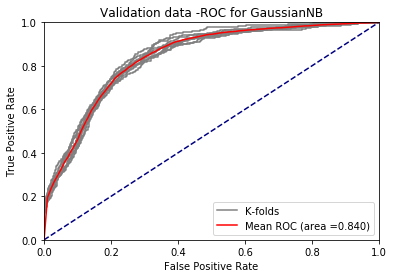

0.840583405916834

In [29]:
clf_GNB=GaussianNB() 
KfoldPlot(train_part_c, clf_GNB, 10)

## KNN 

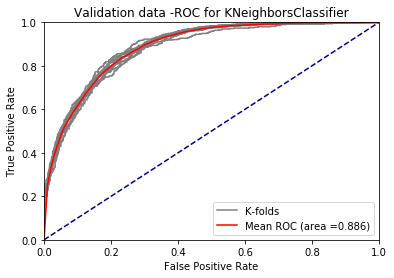

0.886654470431841

In [30]:
clf_KNN = KNeighborsClassifier(n_neighbors=int(train_part_c.shape[0]**0.5), weights="distance",metric="euclidean")
KfoldPlot(train_part_c, clf_KNN, 10)

## Logistic Regression 

C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

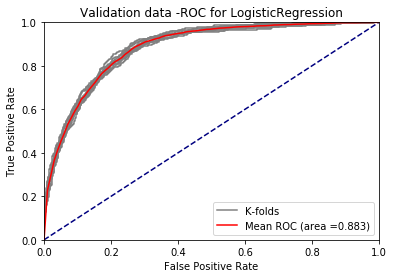

0.8836790963743806

In [31]:
clf_regression = LogisticRegression(penalty='l2', C=1.0, tol = 1e-06, max_iter = 100)
KfoldPlot(train_part_c, clf_regression, 10)


## Decision Tree

C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\sklearn\tree\tree.py:29

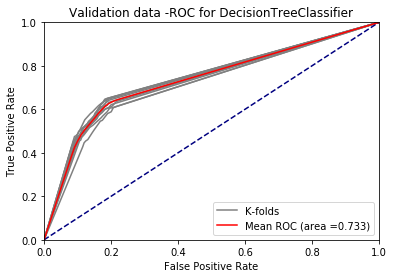

0.7331451382817332

In [32]:
clf_tree = DecisionTreeClassifier( criterion='gini', max_depth=None, 
                                  min_samples_split=7,
                                  max_features='sqrt',
                                  max_leaf_nodes=None,
                                  min_impurity_split=1e-07)
KfoldPlot(train_part_c, clf_tree, 10)



## Neural Network

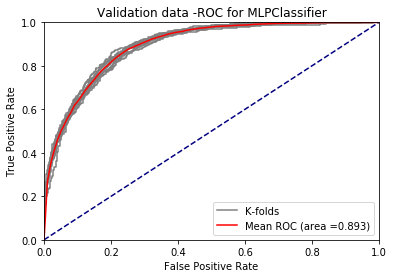

0.893930614812654

In [33]:
ann_clf = MLPClassifier(activation="relu", hidden_layer_sizes= (100,),
                    alpha = 0.01, solver = "sgd",
                    learning_rate_init = 0.1,     
                    learning_rate = "invscaling", power_t = 0.5, 
                    early_stopping = False, tol = 1e-4, 
                    batch_size = 10, max_iter = 500, warm_start = False,                     
                    random_state = 42 # seed
)
KfoldPlot(train_part_c, ann_clf, 10)


# Part D - Evaluation

## Confusion Matrix

In [34]:
# building the confusion matrix on the chosen model to check the efficiency of the ANN model

predict, label = KfoldPlot(train_part_c, ann_clf, 10, True)
cm = confusion_matrix(label, predict)
tn, fp, fn, tp = cm.ravel() # inverse the matrix
table = pd.DataFrame(np.array([[tp,fp],[fn,tn]]), columns=["Actual Positive","Actual Negative"], index = ['Predicted Positive','Predicted Negative'])
print (table)

                    Actual Positive  Actual Negative
Predicted Positive               96                4
Predicted Negative              390             1649


## Overfitting

<Figure size 432x288 with 0 Axes>

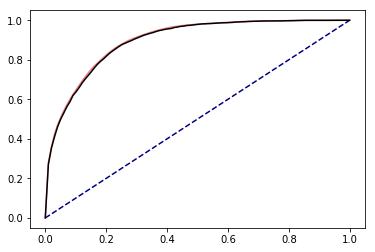

the auc validation value is 0.893930614812654
the auc train value is 0.8973980363714106


In [35]:
# checking the AUC of the Train and the Validation, with the ANN model, and compare between them

auc_validation, auc_train, fpr_interp, tpr_interp_validation, tpr_interp_train = KfoldPlot(train_part_c, ann_clf, 10, False, True)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr_interp, tpr_interp_train, color='lightcoral', linestyle='-', label='Mean ROC Train (area =' + str(auc_train)[:5]+')')
plt.plot(fpr_interp, tpr_interp_validation, color='black', linestyle='-', label='Mean ROC (area =' + str(auc_validation)[:5]+')')
plt.show()

print ("the auc validation value is " + str(auc_validation))
print ("the auc train value is "+ str(auc_train))

# Test

function that makes the same pre processing like we did on the train

In [36]:
def  pre_processing(train, test):
    
    # Clustering
    train_after_cluster, test_after_cluster = cluster(train, test)
    
    # we have two options to normalize the data
    # z-score
    train_after_norm, test_after_norm = z_score_normalization(train_after_cluster, test_after_cluster)
    
    # correlation 
    train_after_corr, test_after_corr = correlations(train_after_norm, test_after_norm)
    
    # PCA
    train_after_PCA, test_after_PCA = principal_component_analysis(train_after_corr, test_after_corr)
    
    
    
    return (train_after_PCA, test_after_PCA)

In [37]:
train_process, test_process = pre_processing(final_train, final_test)


C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Yali\Anaconda2\envs\p3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
#ANN is the chosen model

ann_clf = MLPClassifier(activation="relu", hidden_layer_sizes= (100,),
                    alpha = 0.01, solver = "sgd",
                    learning_rate_init = 0.01,     
                    learning_rate = "invscaling", power_t = 0.5, 
                    early_stopping = False, tol = 1e-4, 
                    batch_size = 10, max_iter = 500, warm_start = False,                     
                    random_state = 42 # seed
)

features = train_process.values[:,:-1]
label = train_process.values[:,-1]
ann_clf.fit(features,label)
predict = ann_clf.predict(test_process)
headers=["label"]

# sending the prediction to the excel file

final=pd.DataFrame(predict,columns=headers)
final.to_csv("test_without_target.csv")